In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-data/train.csv
/kaggle/input/churn-data/test.csv


# **NEXUS TELECOMMUNICATION COMPANY CUSTOMER CHURNS PREDICTION**

## **Import libraries and dataset**

In [2]:
import math
import datetime
import string
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
%matplotlib inline
print('Ready, set, go....')

Ready, set, go....


## **EDA (Exploratory Data Analysis)**

In [3]:
df = pd.read_csv("../input/churn-data/train.csv")

In [4]:
df.shape

(3333, 20)

In [5]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [6]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [8]:
df.nunique()

state                              51
account_length                    212
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1667
total_day_calls                   119
total_day_charge                 1667
total_eve_minutes                1611
total_eve_calls                   123
total_eve_charge                 1440
total_night_minutes              1591
total_night_calls                 120
total_night_charge                933
total_intl_minutes                162
total_intl_calls                   21
total_intl_charge                 162
number_customer_service_calls      10
churn                               2
dtype: int64

In [9]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
df_test = pd.read_csv("../input/churn-data/test.csv")

In [11]:
df_test.shape

(1667, 20)

In [12]:
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [13]:
df_test.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1667 non-null   object 
 1   account_length                 1667 non-null   int64  
 2   area_code                      1667 non-null   object 
 3   international_plan             1667 non-null   object 
 4   voice_mail_plan                1667 non-null   object 
 5   number_vmail_messages          1667 non-null   int64  
 6   total_day_minutes              1667 non-null   float64
 7   total_day_calls                1667 non-null   int64  
 8   total_day_charge               1667 non-null   float64
 9   total_eve_minutes              1667 non-null   float64
 10  total_eve_calls                1667 non-null   int64  
 11  total_eve_charge               1667 non-null   float64
 12  total_night_minutes            1667 non-null   f

In [15]:
df_test.nunique()

state                              51
account_length                    198
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              41
total_day_minutes                1098
total_day_calls                   109
total_day_charge                 1098
total_eve_minutes                1088
total_eve_calls                   109
total_eve_charge                  993
total_night_minutes              1093
total_night_calls                 121
total_night_charge                743
total_intl_minutes                148
total_intl_calls                   19
total_intl_charge                 148
number_customer_service_calls       8
churn                               2
dtype: int64

In [16]:
df_test.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,39.400755,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,98.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
max,238.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


## **Dealing with null values**

In [17]:
df.isnull().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

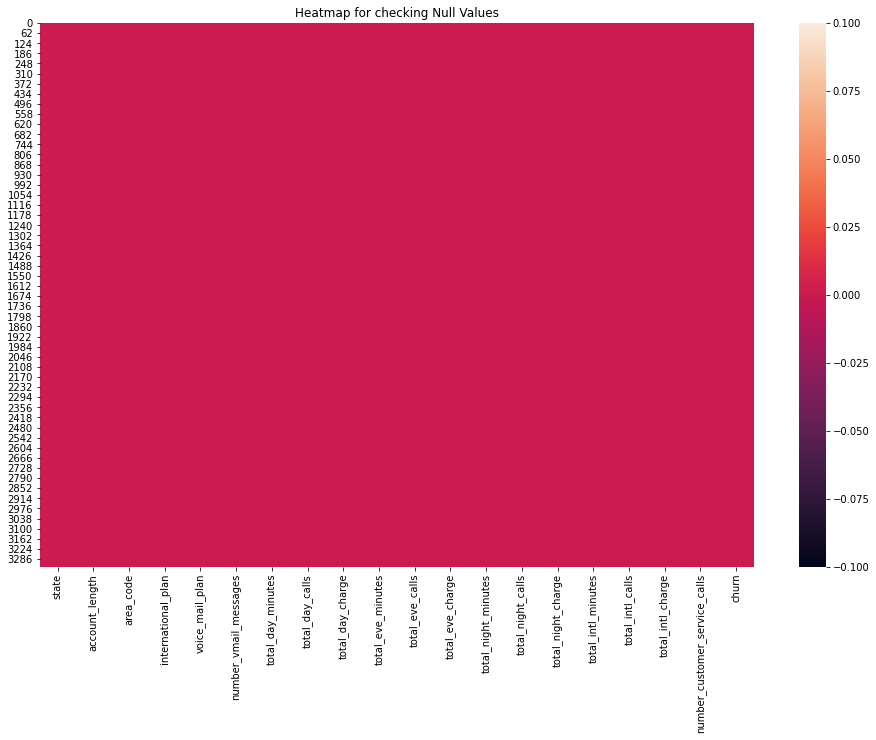

In [18]:
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.title("Heatmap for checking Null Values")
plt.show()

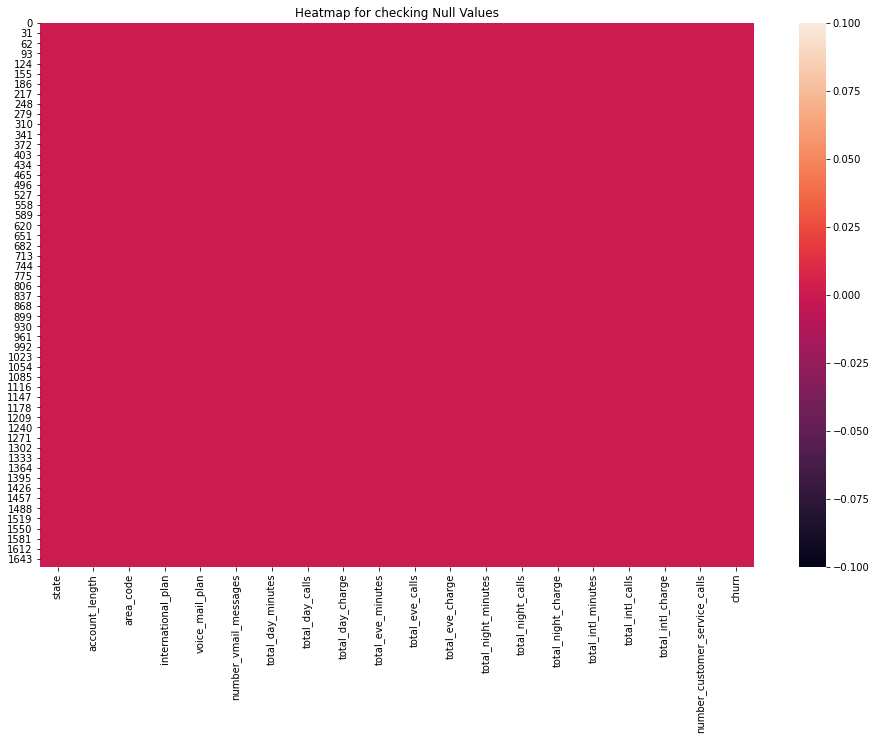

In [19]:
plt.figure(figsize = (16,10))
sns.heatmap(df_test.isnull())
plt.title("Heatmap for checking Null Values")
plt.show()

####  *Continue to visualize the data because there is no null value in the dataset*

## **Visualization**

no     2850
yes     483
Name: churn, dtype: int64

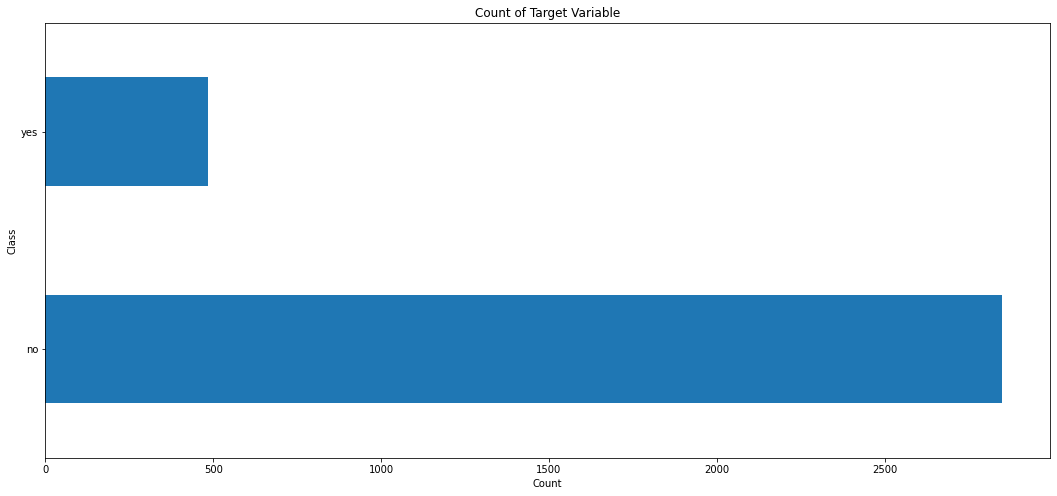

In [20]:
plt.figure(figsize = (18,8))
df["churn"].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Count of Target Variable")

df["churn"].value_counts()

#### *Because there are only 2 target class: Yes and No, so this is a binary classification problem. Furthermore, the number of values in class Yes seems to be dominated by the number of values in class No, so we have to consider to solve the imbalance target variable distribution.*

In [21]:
df_temp = df.copy()
df_temp['churn'].replace({'no':0, 'yes':1}, inplace = True)

In [22]:
df_cor_matrix = df_temp.corr()
df_cor_matrix

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


<AxesSubplot:>

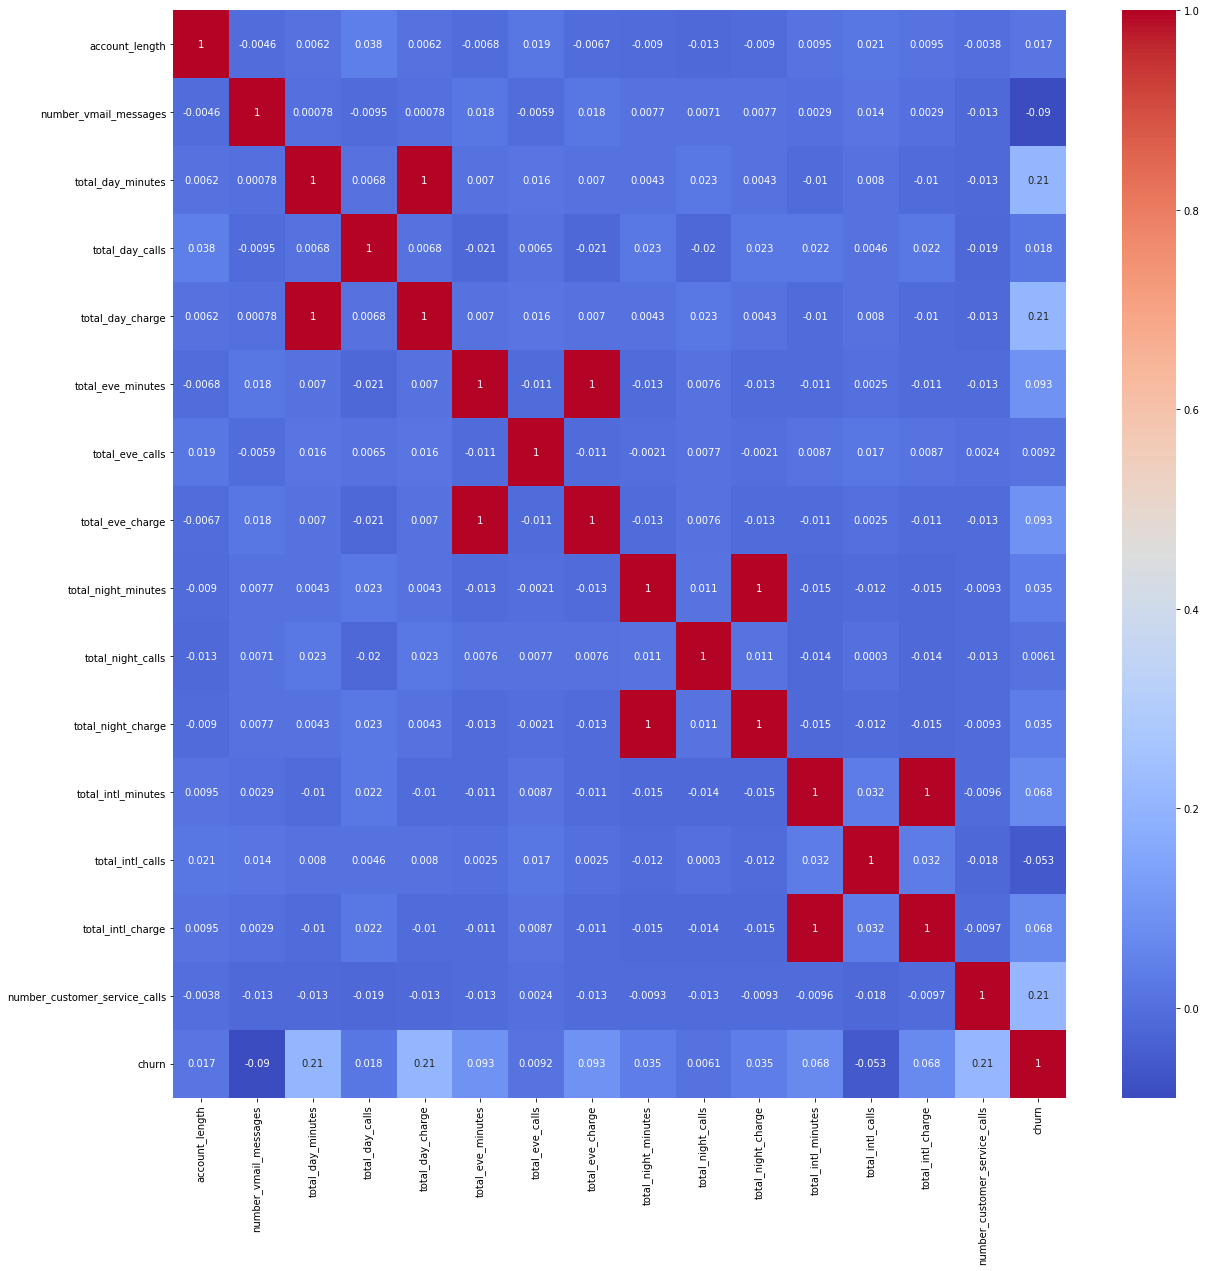

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cor_matrix, cmap = "coolwarm", annot=True)

#### *Finding: As we can see, except the "number_vmail_messages" and the "total_intl_calls", the rest of the features seems to be positively correlated with customer churn. So I'm going to visualize some attributes that immensely affect the customer churn.*

<AxesSubplot:xlabel='churn', ylabel='total_intl_charge'>

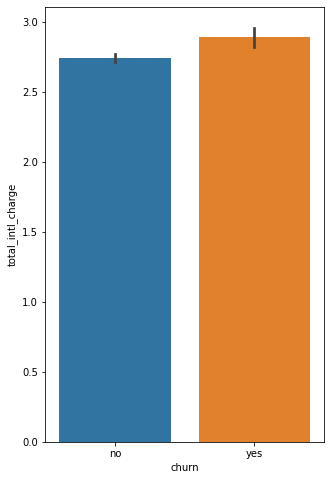

In [24]:
plt.figure(figsize = (5, 8))
sns.barplot(data = df, y = "total_intl_charge", x = "churn")

<AxesSubplot:xlabel='churn', ylabel='total_day_charge'>

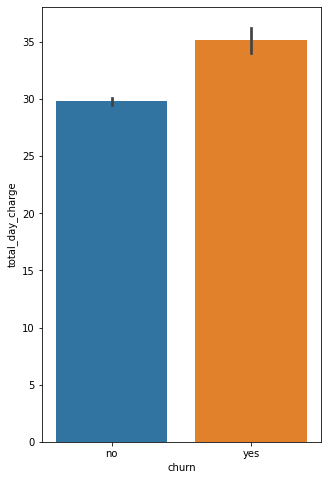

In [25]:
plt.figure(figsize = (5, 8))
sns.barplot(data = df, y = "total_day_charge", x = "churn")

<AxesSubplot:xlabel='churn', ylabel='total_eve_charge'>

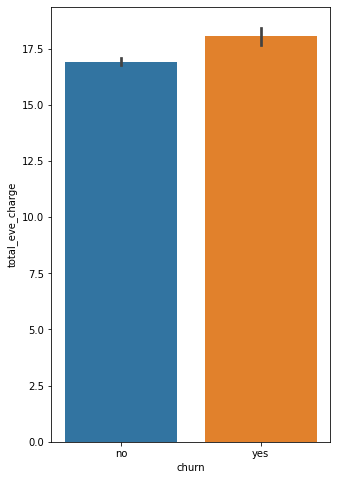

In [26]:
plt.figure(figsize = (5, 8))
sns.barplot(data = df, y = "total_eve_charge", x = "churn")

<AxesSubplot:xlabel='churn', ylabel='total_night_charge'>

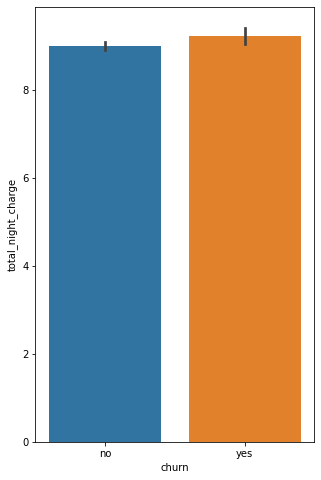

In [27]:
plt.figure(figsize = (5, 8))
sns.barplot(data = df, y = "total_night_charge", x = "churn")

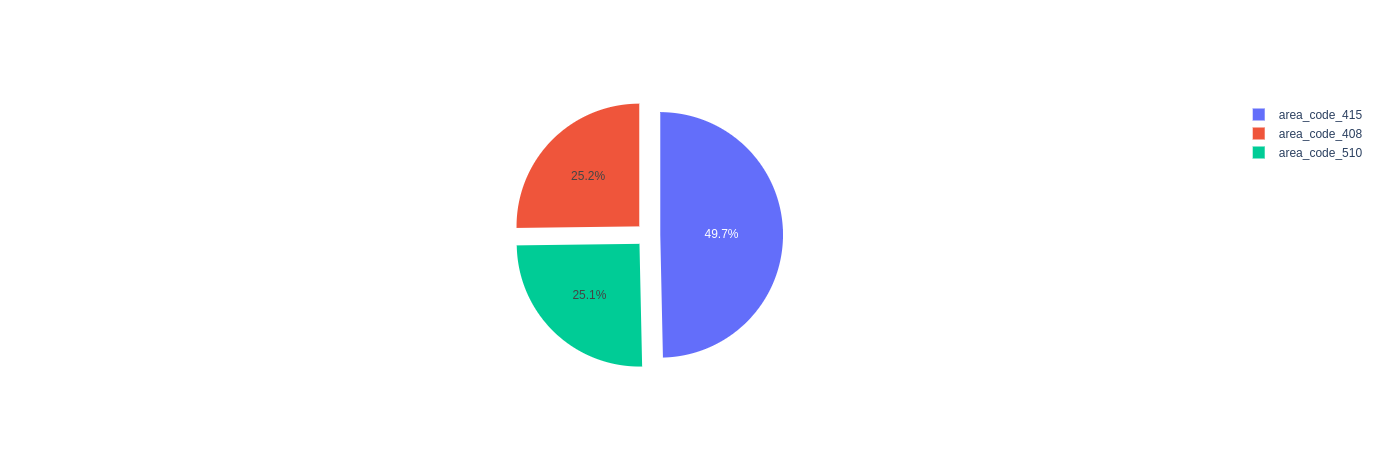

In [28]:
labels = df['area_code'].unique()
values = df['area_code'].value_counts()
diagram = go.Figure(data = [go.Pie(labels = labels, values = values, pull = [0.1, 0.1, 0.1])])
diagram.show()

<AxesSubplot:xlabel='account_length', ylabel='Count'>

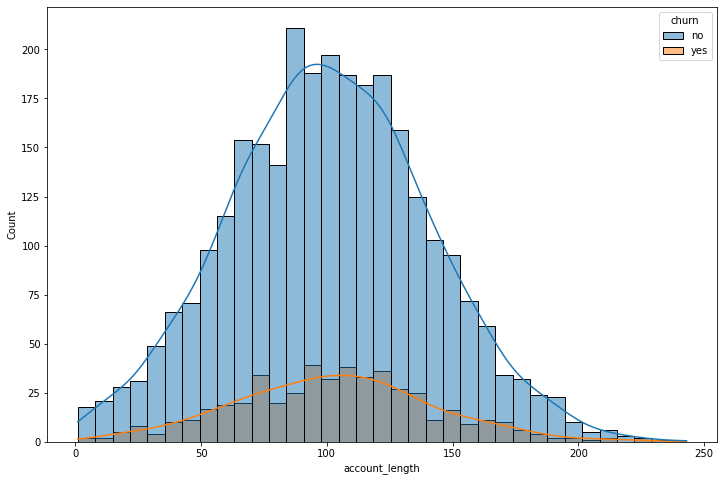

In [29]:
plt.figure(figsize=(12, 8))
sns.histplot(data = df, x = "account_length", kde = True, hue = "churn")

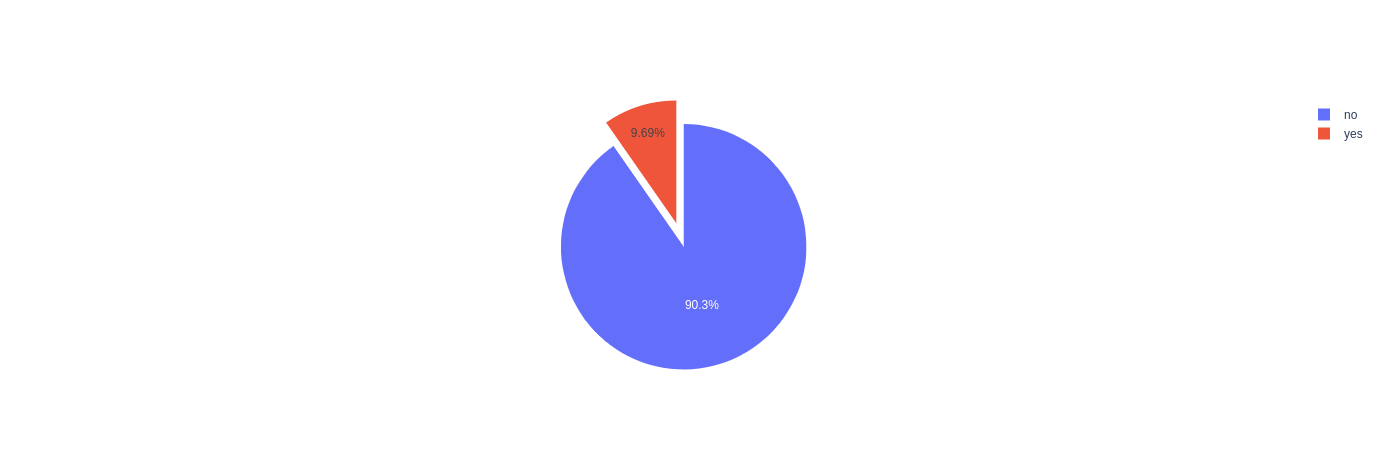

In [30]:
labels = df['international_plan'].unique()
values = df['international_plan'].value_counts()

diagram = go.Figure(data=[go.Pie(labels = labels, values = values, pull = [0.1, 0.1, 0.1])])
diagram.show()

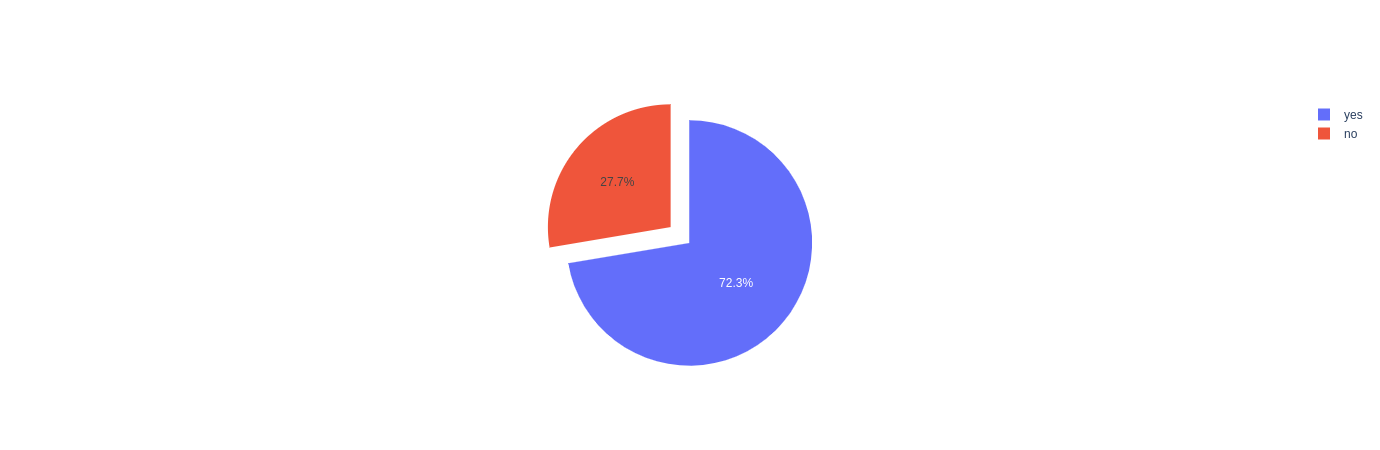

In [31]:
labels = df['voice_mail_plan'].unique()
values = df['voice_mail_plan'].value_counts()

diagram = go.Figure(data=[go.Pie(labels = labels, values = values, pull = [0.1, 0.1, 0.1])])
diagram.show()

<AxesSubplot:xlabel='state'>

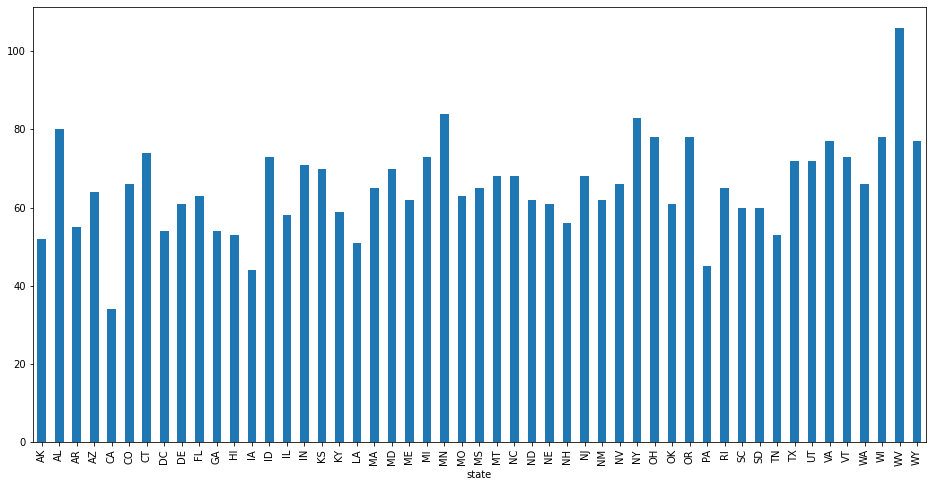

In [32]:
fig,ax = plt.subplots(figsize = (16,8)) 
x = df.groupby('state')[['churn']].size()
x.plot.bar()

## **Prepocessing Data**

In [33]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [34]:
# This is the list of all the features with their respective categorical variables
for i in df.columns:
    if df[i].dtypes == "object":
        print(f'{i}: {df[i].unique()}')
        print("--------------------------------------------------------------")

state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
--------------------------------------------------------------
area_code: ['area_code_415' 'area_code_408' 'area_code_510']
--------------------------------------------------------------
international_plan: ['no' 'yes']
--------------------------------------------------------------
voice_mail_plan: ['yes' 'no']
--------------------------------------------------------------
churn: ['no' 'yes']
--------------------------------------------------------------


#### *As we can observe from the above list, there are few features in the categorical variables are more than 2 values and they aren't "yes" and "no".*

In [35]:
for i in df.columns:
    if (len(df[i].unique()) > 2) & (df[i].dtypes != "int64") & (df[i].dtypes != "float64"):
        print(i)

state
area_code


In [36]:
print(df["state"].value_counts(ascending = True))

CA     34
IA     44
PA     45
LA     51
AK     52
HI     53
TN     53
GA     54
DC     54
AR     55
NH     56
IL     58
KY     59
SC     60
SD     60
NE     61
OK     61
DE     61
ND     62
NM     62
ME     62
MO     63
FL     63
AZ     64
RI     65
MS     65
MA     65
NV     66
WA     66
CO     66
MT     68
NC     68
NJ     68
KS     70
MD     70
IN     71
TX     72
UT     72
MI     73
ID     73
VT     73
CT     74
VA     77
WY     77
WI     78
OR     78
OH     78
AL     80
NY     83
MN     84
WV    106
Name: state, dtype: int64


In [37]:
print(df["area_code"].value_counts(ascending = True))

area_code_408     838
area_code_510     840
area_code_415    1655
Name: area_code, dtype: int64


#### *I'm using one-hot encoding to deal with this kind of feature.*

In [38]:
df = pd.get_dummies(data = df, columns = ["area_code"])
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,no,0,1,0
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,no,0,1,0
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,no,0,1,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,no,1,0,0
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,no,0,1,0


In [39]:
df.dtypes

state                             object
account_length                     int64
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
area_code_area_code_408            uint8
area_code_area_code_415            uint8
area_code_area_code_510            uint8
dtype: object

In [40]:
df["state"].nunique()

51

#### *Now I'm gonna replace 51 values in the "state" column with 51 integer from 0 to 50*

In [41]:
lst = df["state"].unique()
lst.sort()
lst

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [42]:
out_dict = {}
idx = 0
for element in lst:
    out_dict[element] = idx
    idx += 1
out_dict

{'AK': 0,
 'AL': 1,
 'AR': 2,
 'AZ': 3,
 'CA': 4,
 'CO': 5,
 'CT': 6,
 'DC': 7,
 'DE': 8,
 'FL': 9,
 'GA': 10,
 'HI': 11,
 'IA': 12,
 'ID': 13,
 'IL': 14,
 'IN': 15,
 'KS': 16,
 'KY': 17,
 'LA': 18,
 'MA': 19,
 'MD': 20,
 'ME': 21,
 'MI': 22,
 'MN': 23,
 'MO': 24,
 'MS': 25,
 'MT': 26,
 'NC': 27,
 'ND': 28,
 'NE': 29,
 'NH': 30,
 'NJ': 31,
 'NM': 32,
 'NV': 33,
 'NY': 34,
 'OH': 35,
 'OK': 36,
 'OR': 37,
 'PA': 38,
 'RI': 39,
 'SC': 40,
 'SD': 41,
 'TN': 42,
 'TX': 43,
 'UT': 44,
 'VA': 45,
 'VT': 46,
 'WA': 47,
 'WI': 48,
 'WV': 49,
 'WY': 50}

In [43]:
df["state"].replace(out_dict, inplace = True)
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,16,128,no,yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,no,0,1,0
1,35,107,no,yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,no,0,1,0
2,31,137,no,no,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,no,0,1,0
3,35,84,yes,no,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,no,1,0,0
4,36,75,yes,no,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,no,0,1,0


In [44]:
df.dtypes

state                              int64
account_length                     int64
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
area_code_area_code_408            uint8
area_code_area_code_415            uint8
area_code_area_code_510            uint8
dtype: object

### **Feature Scaling**

In [45]:
for i in df.columns:
    if (df[i].dtypes == "int64")  | (df[i].dtypes== "float64"):
        print(i)

state
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### *The min max scaler will scale the values in the range from 0 to 1. So we can eliminate all the columns with values range from 0-1 and consider only columns with high-value range. However, there is no columns seems to be in range of 0 and 1 among all the columns we are about to scale.*

In [47]:
high_value_range_cols = ["state", "account_length", "number_vmail_messages", "total_day_minutes", "total_day_calls", "total_day_charge", "total_eve_minutes", "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls", "total_night_charge", "total_intl_minutes", "total_intl_calls", "total_intl_charge", "number_customer_service_calls"]
df[high_value_range_cols] = scaler.fit_transform(df[high_value_range_cols])
df[high_value_range_cols].head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.32,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111
1,0.70,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111
2,0.62,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000
3,0.70,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222
4,0.72,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333


In [48]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.32,0.524793,no,yes,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,...,0.408451,0.595935,0.500,0.15,0.500000,0.111111,no,0,1,0
1,0.70,0.438017,no,yes,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,...,0.492958,0.622236,0.685,0.15,0.685185,0.111111,no,0,1,0
2,0.62,0.561983,no,no,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,...,0.500000,0.375374,0.610,0.25,0.609259,0.000000,no,0,1,0
3,0.70,0.342975,yes,no,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,...,0.394366,0.467424,0.330,0.35,0.329630,0.222222,no,1,0,0
4,0.72,0.305785,yes,no,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,...,0.619718,0.440526,0.505,0.15,0.505556,0.333333,no,0,1,0


In [49]:
for i in df.columns:
    if (df[i].dtypes == "object"):
        print(i)

international_plan
voice_mail_plan
churn


#### *The above columns are having object type of dataset, which is only "yes", and "no".*

In [50]:
yes_no_cols = ["international_plan", "voice_mail_plan", "churn"]
for i in yes_no_cols:
    df[i].replace({"yes": 1, "no": 0}, inplace = True)
df[yes_no_cols].head()

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [51]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.32,0.524793,0,1,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,...,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0,0,1,0
1,0.70,0.438017,0,1,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,...,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0,0,1,0
2,0.62,0.561983,0,0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,...,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0,0,1,0
3,0.70,0.342975,1,0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,...,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0,1,0,0
4,0.72,0.305785,1,0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,...,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0,0,1,0


#### *Now we split the dataset into Feature Matrix and Target Variable.*

In [52]:
X = df.drop("churn",axis = 1)
y = df["churn"]

In [53]:
X.shape, y.shape

((3333, 21), (3333,))

#### *Performing Train Test Split*

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## **Models Building and Testing**

#### *In this notebook, I'm going to apply 6 machine learning algorithms to the dataset*


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import  model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [56]:
models = []
models.append(("LR_model", LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(("DT_model", DecisionTreeClassifier()))
models.append(("RF_model", RandomForestClassifier()))
models.append(("XGB_model", XGBClassifier()))
models.append(("KNN_model", KNeighborsClassifier()))
models.append(("SVM_model", SVC()))

In [57]:
results = []
names = []

In [58]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 5, random_state = 42)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    output = "{mod}:{res}({std})".format(mod = name, res = cv_results.mean(), std = cv_results.std())
    print(output)

LR_model:0.8610798204501352(0.015253088104146308)
DT_model:0.9144923033978506(0.01282307567828588)
RF_model:0.9513959236597918(0.003075907744003886)
[06:08:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:08:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:08:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:08:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation m

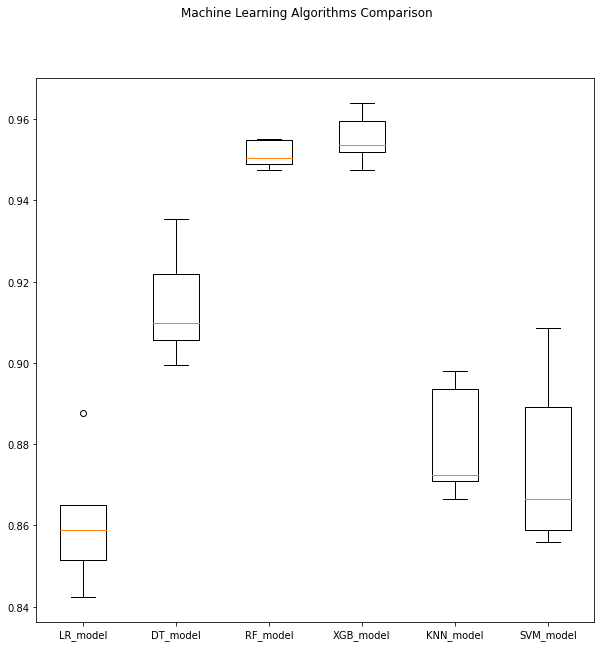

In [59]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Machine Learning Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### *After fitting the data into 6 different algorithms, I found out that with the default parameters, 2 algorithms that perform extremely outstanding compared to the other are: Random Forest and Extreme Gradient Boosting. So I decided to build and tune the model based on these 2 algorithms.*

### **Random Forest**

In [60]:
# kf = model_selection.KFold(n_splits=5, random_state=42)

In [61]:
# models = []
# accuracy = []

# for train_idx, valid_idx in kf.split(X, y):
#     X_train, X_val = X.iloc[train_idx], X.iloc[valid_idx]
#     y_train, y_val = y.iloc[train_idx], y.iloc[valid_idx]
    
#     rf_classifier.fit(X_train, y_train)
    
#     y_pred = rf_classifier.predict(X_val)
#     res = accuracy_score(y_val, y_pred)
    
#     accuracy.append(res)
#     models.append(rf_classifier)

#### *The above kfold method to train our model. However, when use kfold to split the dataset, it'll come to the result that there are a number of models which is extremely inconvenience when calculating the accuracy score as well as when building confusion matrix*

In [62]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42)

In [63]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
rf_y_pred = rf_classifier.predict(X_valid)

#### *After fitting the training set into the Random Forest algorithm, we apply the x validation set (X_valid) to predict the prediction set (y_pred). Now, we print out the accuracy score, the Confusion Matrix and the classification report.* 

In [65]:
rf = round(accuracy_score(y_valid, rf_y_pred)*100, 3)
print(rf)

94.153


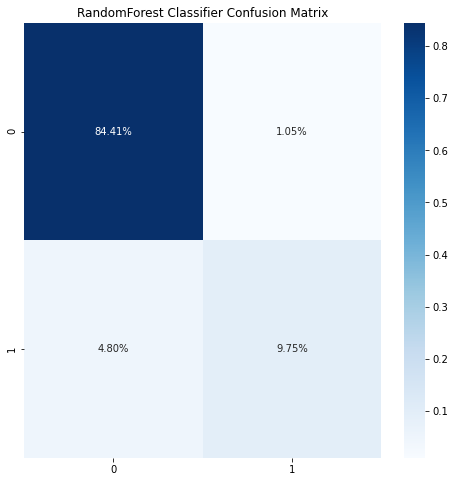

In [66]:
plt.figure(figsize = (8, 8))
cm1 = confusion_matrix(y_valid, rf_y_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')
plt.title("RandomForest Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [67]:
print(classification_report(y_valid,rf_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.90      0.67      0.77        97

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



#### *So after observing the accuracy score, I'm going to look again at all the values that my algorithm has predicted wrong so I can figure out a way to enhance the accuracy score.*

In [68]:
a = list(y_valid)

In [69]:
b = list(rf_y_pred)

In [70]:
count = 0
list_idx = []

for i in range(len(a)):
    if a[i] != b[i]:
        list_idx.append(i)

In [71]:
list_idx

[38,
 44,
 64,
 102,
 136,
 202,
 216,
 231,
 236,
 258,
 260,
 262,
 265,
 274,
 318,
 328,
 345,
 370,
 386,
 443,
 469,
 484,
 485,
 520,
 525,
 527,
 535,
 538,
 540,
 550,
 561,
 564,
 574,
 576,
 586,
 602,
 621,
 631,
 650]

In [72]:
rf_flaws = df_temp.iloc[list_idx]
rf_flaws

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
38,AK,136,area_code_415,yes,yes,33,203.9,106,34.66,187.6,99,15.95,101.7,107,4.58,10.5,6,2.84,3,0
44,WI,64,area_code_510,no,no,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
64,NC,38,area_code_408,no,no,0,131.2,98,22.30,162.9,97,13.85,159.0,106,7.15,8.2,6,2.21,2,0
102,VT,135,area_code_415,no,no,0,151.7,82,25.79,119.0,105,10.12,180.0,100,8.10,10.5,6,2.84,0,0
136,NY,75,area_code_415,no,yes,21,175.8,97,29.89,217.5,106,18.49,237.5,134,10.69,5.3,4,1.43,5,0
202,MD,97,area_code_415,no,no,0,218.0,86,37.06,184.0,94,15.64,240.5,110,10.82,6.4,8,1.73,3,0
216,FL,93,area_code_415,no,no,0,151.4,89,25.74,186.4,76,15.84,172.5,120,7.76,10.9,3,2.94,0,0
231,OH,63,area_code_415,yes,yes,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,0
236,SD,110,area_code_408,no,yes,40,202.6,103,34.44,118.8,128,10.10,234.9,98,10.57,9.0,9,2.43,2,0
258,KS,92,area_code_408,yes,no,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,1


In [73]:
rf_flaws.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.342541,-0.075155,0.109967,-0.075105,-0.126706,0.194481,-0.126781,-0.086823,0.105045,-0.086598,0.236456,-0.021711,0.237265,0.011727,-0.135547
number_vmail_messages,-0.342541,1.000000,0.064561,-0.052522,0.064500,0.082929,-0.079485,0.083162,0.093456,0.018887,0.093417,-0.051237,0.291817,-0.051485,0.067183,-0.206145
total_day_minutes,-0.075155,0.064561,1.000000,0.002715,1.000000,0.143467,0.121847,0.143505,-0.087585,0.158385,-0.087432,-0.164856,0.162353,-0.165300,0.305122,-0.098843
total_day_calls,0.109967,-0.052522,0.002715,1.000000,0.002660,-0.155729,-0.163639,-0.155833,-0.130304,-0.064743,-0.130424,0.038947,0.101365,0.038950,-0.263208,-0.048191
total_day_charge,-0.075105,0.064500,1.000000,0.002660,1.000000,0.143526,0.121837,0.143564,-0.087624,0.158470,-0.087471,-0.164876,0.162253,-0.165320,0.305112,-0.098814
total_eve_minutes,-0.126706,0.082929,0.143467,-0.155729,0.143526,1.000000,-0.102232,1.000000,0.334388,0.028520,0.334290,0.186052,-0.128483,0.185315,0.122154,0.047979
total_eve_calls,0.194481,-0.079485,0.121847,-0.163639,0.121837,-0.102232,1.000000,-0.102304,-0.148132,-0.015154,-0.147884,0.105095,0.034045,0.105187,0.189362,-0.004519
total_eve_charge,-0.126781,0.083162,0.143505,-0.155833,0.143564,1.000000,-0.102304,1.000000,0.334466,0.028536,0.334368,0.186122,-0.128261,0.185386,0.122265,0.047837
total_night_minutes,-0.086823,0.093456,-0.087585,-0.130304,-0.087624,0.334388,-0.148132,0.334466,1.000000,-0.135040,0.999999,-0.110797,0.009726,-0.111394,0.110126,0.117443
total_night_calls,0.105045,0.018887,0.158385,-0.064743,0.158470,0.028520,-0.015154,0.028536,-0.135040,1.000000,-0.135102,-0.030164,0.097944,-0.030456,0.138235,-0.194865


<AxesSubplot:>

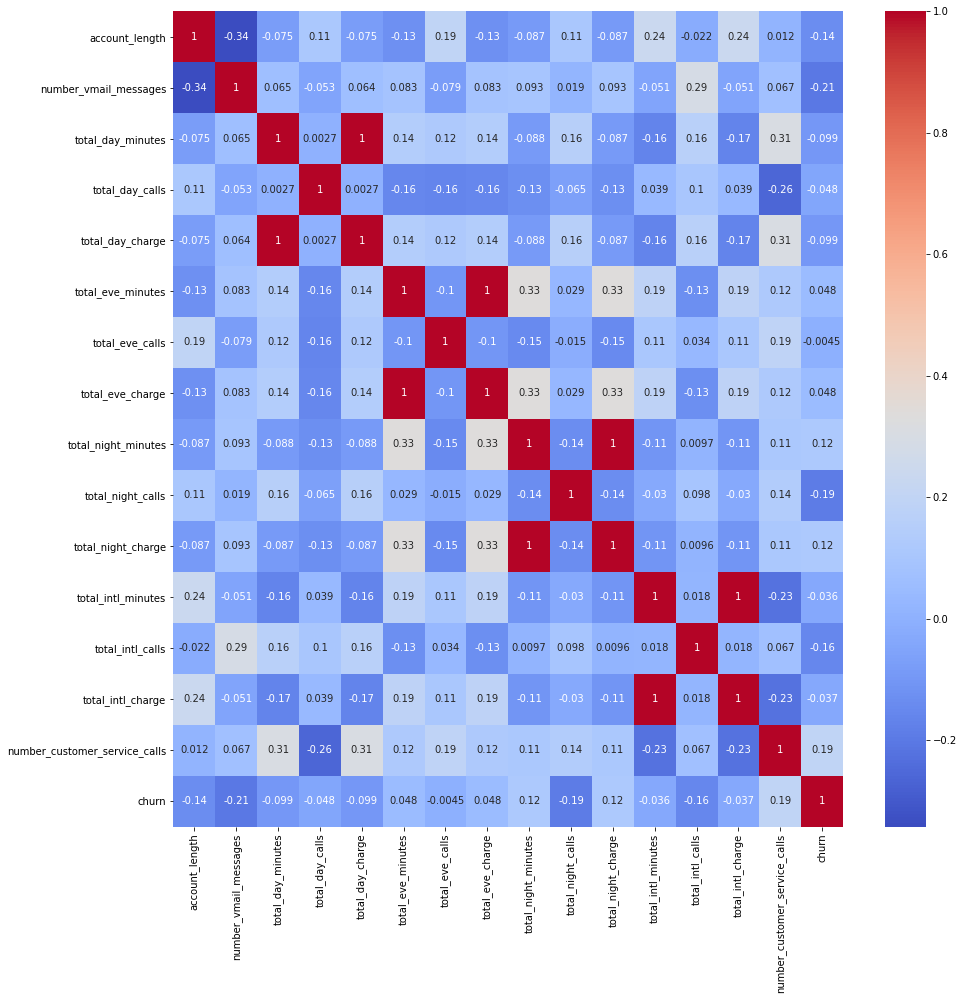

In [74]:
plt.figure(figsize = (15, 15))
sns.heatmap(rf_flaws.corr(), cmap = "coolwarm", annot = True)

#### *The heat map above shows us the correlation matrix of the flaws when applying Random forest classifier(values that the algorithms predicted wrong) and we can see that "the number of services calls", "the total of night charges", and "the total of night minutes" have a strong impact on the churn.*

In [75]:
rf_classifier.feature_importances_

array([0.023953  , 0.02964466, 0.0759046 , 0.02246239, 0.03124538,
       0.12882957, 0.03202486, 0.15719085, 0.05712576, 0.02604984,
       0.06272029, 0.03263822, 0.02880151, 0.03136592, 0.04024408,
       0.04736637, 0.03969614, 0.12110666, 0.00337945, 0.00422617,
       0.00402425])

In [76]:
rf_feature_importance = rf_classifier.feature_importances_
feature_names = np.array(df.columns.drop("churn"))

data1 = {"feature_names": feature_names,"rf_feature_importance": rf_feature_importance}
rf_fw = pd.DataFrame(data1)
rf_fw

,feature_names,rf_feature_importance
0,state,0.023953
1,account_length,0.029645
2,international_plan,0.075905
3,voice_mail_plan,0.022462
4,number_vmail_messages,0.031245
5,total_day_minutes,0.128830
6,total_day_calls,0.032025
7,total_day_charge,0.157191
8,total_eve_minutes,0.057126
9,total_eve_calls,0.026050


In [77]:
rf_fw.sort_values(by = ["rf_feature_importance"], ascending = False, inplace = True)
rf_fw

,feature_names,rf_feature_importance
7,total_day_charge,0.157191
5,total_day_minutes,0.128830
17,number_customer_service_calls,0.121107
2,international_plan,0.075905
10,total_eve_charge,0.062720
8,total_eve_minutes,0.057126
15,total_intl_calls,0.047366
14,total_intl_minutes,0.040244
16,total_intl_charge,0.039696
11,total_night_minutes,0.032638


Text(0, 0.5, 'Names')

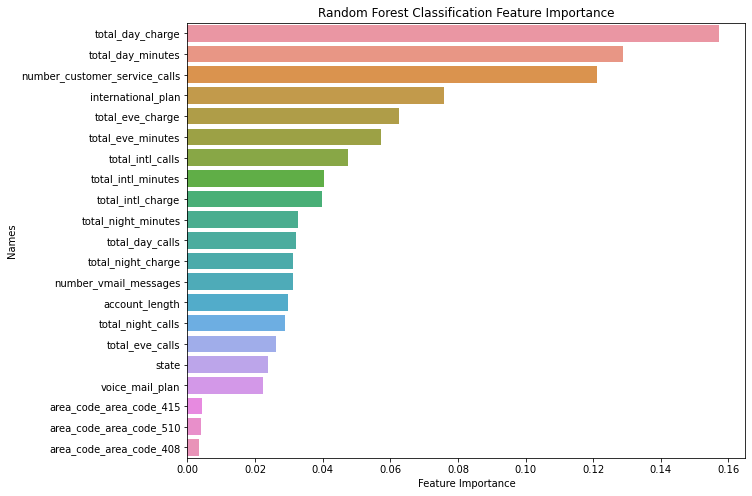

In [78]:
plt.figure(figsize = (10, 8))
sns.barplot(x = rf_fw["rf_feature_importance"], y = rf_fw["feature_names"])
plt.title("Random Forest Classification Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Names")

#### *The above bar chart represents the importances of each features and we can see that "the total day charges", "the total day minutes" and "the number of customer services calls" have huge impact on the prediction of the model.*

### **Random Forest Tuning**

In [79]:
rf_hyperparameters_grid1 = {
    "n_estimators": [50, 100, 500, 1000, 2000],
    "min_samples_leaf": [1, 2, 4,],
    "min_samples_split": [2, 5, 10],
    "bootstrap": [True, False]
}

model_rf = RandomForestClassifier()

rf_grid_search1 = GridSearchCV(
    model_rf, rf_hyperparameters_grid1, cv = 5, scoring = "accuracy")
rf_grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 500, 1000, 2000]},
             scoring='accuracy')

In [80]:
rf_grid_search1.best_params_

{'bootstrap': True,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [81]:
rf_grid_search1.best_score_

0.9572436424450675

### **Extreme Gradient Boosting**

In [82]:
xgb_classifier = XGBClassifier(random_state = 42)

In [83]:
xgb_classifier.fit(X_train,y_train)

[06:37:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
xgb_y_pred = xgb_classifier.predict(X_valid)

#### *After fitting the training set into the Extreme Gradient Boosit algorithm, we apply the x validation set (X_valid) to predict the prediction set (y_pred). Now, we print out the accuracy score, the Confusion Matrix and the classification report.* 

In [85]:
xgb = round(accuracy_score(y_valid, xgb_y_pred)*100, 3)
print(xgb)

94.603


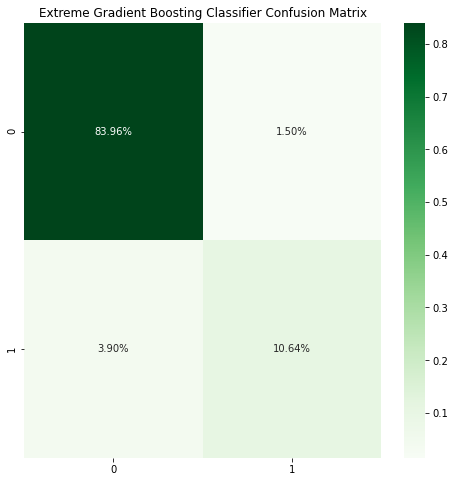

In [86]:
plt.figure(figsize = (8, 8))
cm2 = confusion_matrix(y_valid, xgb_y_pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Greens')
plt.title("Extreme Gradient Boosting Classifier Confusion Matrix", fontsize = 12)
plt.show()

In [87]:
print(classification_report(y_valid,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.88      0.73      0.80        97

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.88       667
weighted avg       0.94      0.95      0.94       667



#### *So after observing the accuracy score, I'm going to look again at all the values that my algorithm has predicted wrong so I can figure out a way to enhance the accuracy score.*

In [88]:
a = list(y_valid)

In [89]:
c = list(xgb_y_pred)

In [90]:
count = 0
idx_list = []

for i in range(len(a)):
    if a[i] != c[i]:
        idx_list.append(i)

In [91]:
xgb_flaws = df_temp.iloc[idx_list]
xgb_flaws

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
23,SC,111,area_code_415,no,no,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
38,AK,136,area_code_415,yes,yes,33,203.9,106,34.66,187.6,99,15.95,101.7,107,4.58,10.5,6,2.84,3,0
44,WI,64,area_code_510,no,no,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
64,NC,38,area_code_408,no,no,0,131.2,98,22.30,162.9,97,13.85,159.0,106,7.15,8.2,6,2.21,2,0
136,NY,75,area_code_415,no,yes,21,175.8,97,29.89,217.5,106,18.49,237.5,134,10.69,5.3,4,1.43,5,0
216,FL,93,area_code_415,no,no,0,151.4,89,25.74,186.4,76,15.84,172.5,120,7.76,10.9,3,2.94,0,0
236,SD,110,area_code_408,no,yes,40,202.6,103,34.44,118.8,128,10.10,234.9,98,10.57,9.0,9,2.43,2,0
258,KS,92,area_code_408,yes,no,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,1
260,MN,24,area_code_510,no,yes,25,164.9,110,28.03,209.3,105,17.79,231.2,55,10.40,6.7,9,1.81,1,0
262,NM,117,area_code_415,no,no,0,143.3,103,24.36,211.3,108,17.96,185.2,96,8.33,11.5,3,3.11,1,0


In [92]:
xgb_flaws.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.260042,0.001138,0.067896,0.001193,0.027980,0.140263,0.027844,0.008886,0.216561,0.009107,0.351929,0.067838,0.353344,-0.033546,-0.037761
number_vmail_messages,-0.260042,1.000000,0.088672,-0.092464,0.088621,0.035813,-0.151489,0.035977,0.046466,0.186966,0.046430,-0.112104,0.271829,-0.112183,0.126448,-0.284440
total_day_minutes,0.001138,0.088672,1.000000,-0.227819,1.000000,0.291827,0.085055,0.291911,0.113336,0.119754,0.113687,-0.033930,0.269997,-0.033815,0.195568,0.191839
total_day_calls,0.067896,-0.092464,-0.227819,1.000000,-0.227861,-0.194643,-0.125736,-0.194622,0.047370,-0.089925,0.047072,0.029735,-0.003996,0.029612,-0.248012,-0.146856
total_day_charge,0.001193,0.088621,1.000000,-0.227861,1.000000,0.291894,0.085001,0.291979,0.113289,0.119845,0.113640,-0.033965,0.269926,-0.033851,0.195597,0.191883
total_eve_minutes,0.027980,0.035813,0.291827,-0.194643,0.291894,1.000000,-0.106038,1.000000,0.181885,0.132792,0.181768,0.208014,-0.041330,0.207844,0.041542,0.069208
total_eve_calls,0.140263,-0.151489,0.085055,-0.125736,0.085001,-0.106038,1.000000,-0.106090,-0.179581,-0.174133,-0.179169,0.219637,0.067845,0.219963,0.078478,-0.042493
total_eve_charge,0.027844,0.035977,0.291911,-0.194622,0.291979,1.000000,-0.106090,1.000000,0.181973,0.132765,0.181855,0.208077,-0.041256,0.207908,0.041657,0.069012
total_night_minutes,0.008886,0.046466,0.113336,0.047370,0.113289,0.181885,-0.179581,0.181973,1.000000,-0.273362,0.999999,-0.106981,0.047151,-0.107903,-0.009363,0.182957
total_night_calls,0.216561,0.186966,0.119754,-0.089925,0.119845,0.132792,-0.174133,0.132765,-0.273362,1.000000,-0.273312,0.069714,0.181090,0.069624,0.071758,-0.195328


<AxesSubplot:>

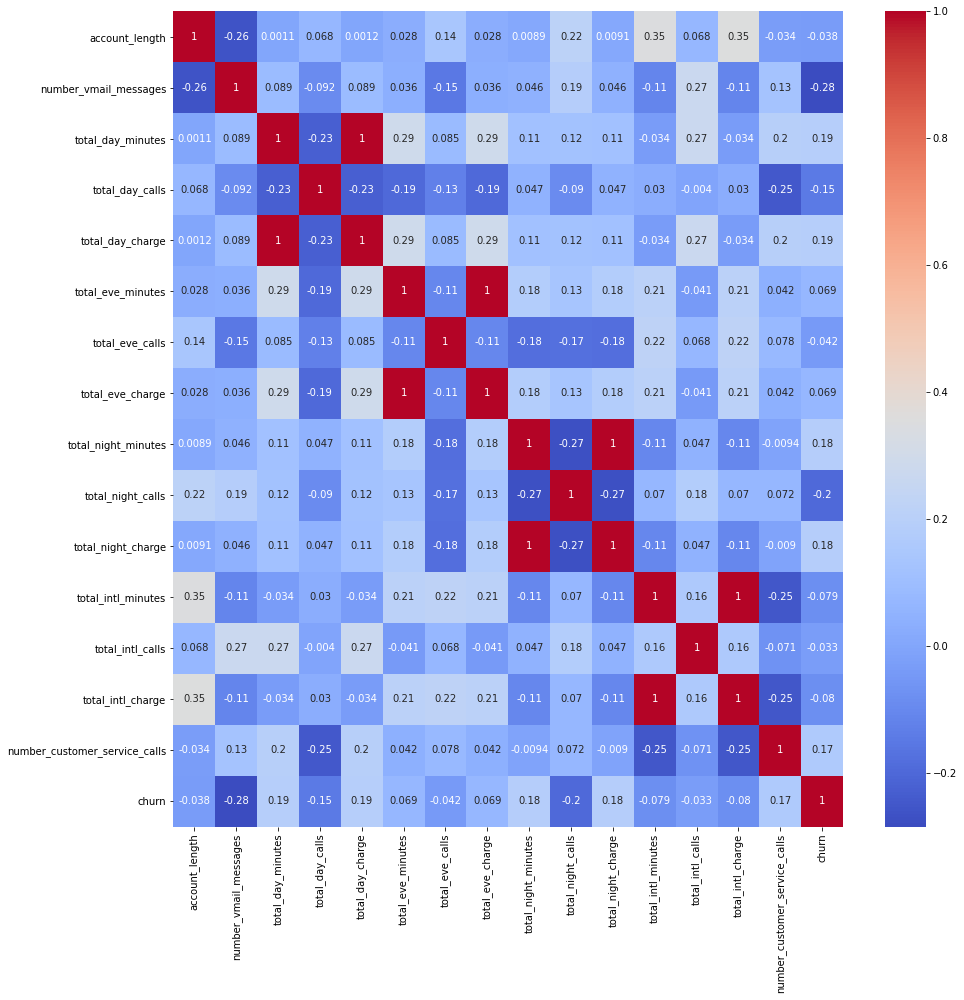

In [93]:
plt.figure(figsize = (15, 15))
sns.heatmap(xgb_flaws.corr(), cmap = "coolwarm", annot = True)

#### *The heat map above shows us the correlation matrix of the flaws when applying Extreme Gradient Boosting classifier(values that the algorithms predicted wrong) and we can see that "the number of services calls", "the total of night charges", "the total of night minutes", "the total day charges", and "the total day minutes"  have a strong impact on the churn.*

In [94]:
xgb_classifier.feature_importances_

array([0.02097959, 0.02575235, 0.14045663, 0.20427741, 0.0235885 ,
       0.08956405, 0.01904055, 0.        , 0.05859367, 0.02371983,
       0.        , 0.03047722, 0.0222621 , 0.        , 0.0604711 ,
       0.07610382, 0.        , 0.13519922, 0.02669518, 0.01902649,
       0.02379218], dtype=float32)

In [95]:
xgb_feature_importance = xgb_classifier.feature_importances_
feature_names = np.array(df.columns.drop("churn"))

data2 = {"feature_names": feature_names,"xgb_feature_importance": xgb_feature_importance}
xgb_fw = pd.DataFrame(data2)
xgb_fw

,feature_names,xgb_feature_importance
0,state,0.020980
1,account_length,0.025752
2,international_plan,0.140457
3,voice_mail_plan,0.204277
4,number_vmail_messages,0.023588
5,total_day_minutes,0.089564
6,total_day_calls,0.019041
7,total_day_charge,0.000000
8,total_eve_minutes,0.058594
9,total_eve_calls,0.023720


In [96]:
xgb_fw.sort_values(by = ["xgb_feature_importance"], ascending = False, inplace = True)
xgb_fw

,feature_names,xgb_feature_importance
3,voice_mail_plan,0.204277
2,international_plan,0.140457
17,number_customer_service_calls,0.135199
5,total_day_minutes,0.089564
15,total_intl_calls,0.076104
14,total_intl_minutes,0.060471
8,total_eve_minutes,0.058594
11,total_night_minutes,0.030477
18,area_code_area_code_408,0.026695
1,account_length,0.025752


Text(0, 0.5, 'Names')

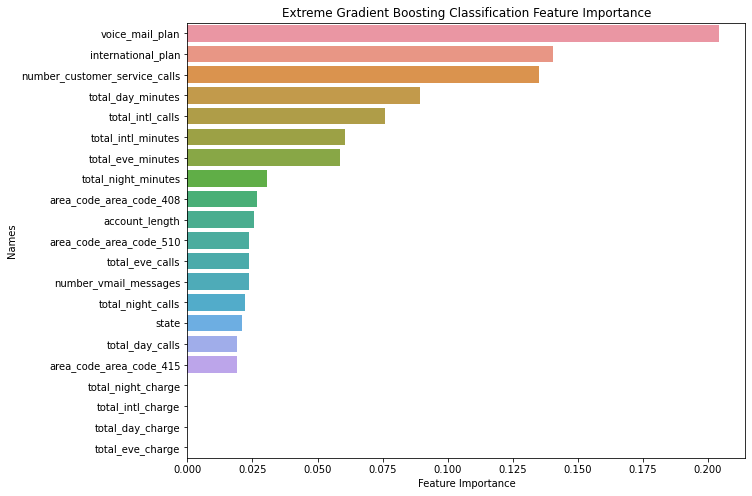

In [97]:
plt.figure(figsize = (10, 8))
sns.barplot(x = xgb_fw["xgb_feature_importance"], y = xgb_fw["feature_names"])
plt.title("Extreme Gradient Boosting Classification Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Names")

#### *The above bar chart represents the importances of each features in the XGBoost model and we can see that "voice mail plan", "the international plan" and "the number of customer services calls" have huge impact on the prediction of the model.*

### **XGBoost Tuning**

#### *Step 1: Try to train the XGB model with default hyper parameters and with a number of n_estimators.*

In [98]:
xgb_hyperparameters_grid1 = {
    "n_estimators": [500, 1000, 1500],
    "learning_rate": [0.1],
    "max_depth": [5],
    "min_child_weight": [1],
    "gamma": [0],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "scale_pos_weight": [1],
    "objective": ["binary:logistic"],
    "nthread": [4],
    "sead": [27]
}
    
model_xgb = XGBClassifier()

xgb_grid_search1 = GridSearchCV(
    model_xgb, xgb_hyperparameters_grid1, cv = 5, scoring = "accuracy")
xgb_grid_search1.fit(X_train, y_train)

[06:38:02] WARNING: ../src/learner.cc:573: 
Parameters: { "sead" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:38:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:38:03] WARNING: ../src/learner.cc:573: 
Parameters: { "sead" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:38:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation me

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0],
      

In [99]:
xgb_grid_search1.best_score_

0.9546177034804056

In [100]:
xgb_grid_search1.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'sead': 27,
 'subsample': 0.8}

#### *Step 2: Now I'm going to tune the max_depth and min_child_weight parameters.*

In [101]:
param_test1 = {
 "max_depth": range(3,10,2),
 "min_child_weight": range(1,6,2)
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 150, max_depth = 5, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search2 = GridSearchCV(
    model_xgb, param_test1, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search2.fit(X_train, y_train)

[06:39:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [102]:
xgb_grid_search2.best_score_

0.9579920034291094

In [103]:
xgb_grid_search2.best_params_

{'max_depth': 7, 'min_child_weight': 1}

In [104]:
param_test2 = {
 "max_depth": [6,7,8],
 "min_child_weight": [1,2]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 150, max_depth = 5, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search3 = GridSearchCV(
    model_xgb, param_test2, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search3.fit(X_train, y_train)

[06:39:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [105]:
xgb_grid_search3.best_score_

0.9579920034291094

In [106]:
xgb_grid_search3.best_params_

{'max_depth': 7, 'min_child_weight': 1}

#### *Step 3: Apply the tuned parameters on the model and tune gamma.*

In [107]:
param_test3 = {
 "gamma":[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 150, max_depth = 7, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search4 = GridSearchCV(
    model_xgb, param_test3, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search4.fit(X_train, y_train)

[06:40:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [108]:
xgb_grid_search4.best_score_

0.9587417697858915

In [109]:
xgb_grid_search4.best_params_

{'gamma': 0.1}

#### *Step 4: Tuning subsample and colsample_bytree.*

In [110]:
param_test4 = {
 "subsample":[0.5, 0.6, 0.7, 0.8, 0.9],
 "colsample_bytree":[0.5, 0.6, 0.7, 0.8, 0.9]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 150, max_depth = 7, min_child_weight = 1, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search5 = GridSearchCV(
    model_xgb, param_test4, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search5.fit(X_train, y_train)

[06:41:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [111]:
xgb_grid_search5.best_score_

0.9587417697858915

In [112]:
xgb_grid_search5.best_params_

{'colsample_bytree': 0.8, 'subsample': 0.8}

In [113]:
param_test5 = {
 "subsample":[0.75, 0.8, 0.85],
 "colsample_bytree":[0.75, 0.8, 0.85]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 150, max_depth = 7, min_child_weight = 1, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search6 = GridSearchCV(
    model_xgb, param_test5, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search6.fit(X_train, y_train)

[06:42:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [114]:
xgb_grid_search6.best_score_

0.9587417697858915

In [115]:
xgb_grid_search6.best_params_

{'colsample_bytree': 0.8, 'subsample': 0.8}

#### *Step 5: Tuning Regularization Parameters (lambda)*

In [116]:
param_test6 = {
 "reg_alpha": [0, 0.001, 0.005, 0.01, 0.05]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 150, max_depth = 7, min_child_weight = 1, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search7 = GridSearchCV(
    model_xgb, param_test6, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search7.fit(X_train, y_train)

[06:42:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [117]:
xgb_grid_search7.best_score_

0.9587417697858915

In [118]:
xgb_grid_search7.best_params_

{'reg_alpha': 0}

#### *Step 6: Find the suitable n_estimators and reduce learning rate.*

In [119]:
param_test7 = {
 "n_estimators": [100, 150, 200, 250, 300, 2000]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 150, max_depth = 7, min_child_weight = 1, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", reg_alpha = 0, nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search8 = GridSearchCV(
    model_xgb, param_test7, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search8.fit(X_train, y_train)

[06:43:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=0, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=N

In [120]:
xgb_grid_search8.best_score_

0.9587438778450015

In [121]:
xgb_grid_search8.best_params_

{'n_estimators': 250}

In [122]:
param_test8 = {
 "learning_rate": [0.0001, 0.001, 0.01, 0.1]
}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 250, max_depth = 7, min_child_weight = 1, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", reg_alpha = 0, nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search9 = GridSearchCV(
    model_xgb, param_test8, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search9.fit(X_train, y_train)

[06:43:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=0, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=N

In [123]:
xgb_grid_search9.best_score_

0.9587438778450015

In [124]:
xgb_grid_search9.best_params_

{'learning_rate': 0.1}

In [125]:
xgb_hyperparameters_grid_best ={}

model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 250, max_depth = 7, min_child_weight = 1, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8,
 objective = "binary:logistic", reg_alpha = 0, nthread = 4, scale_pos_weight = 1, seed = 27)

xgb_grid_search_final = GridSearchCV(
    model_xgb, xgb_hyperparameters_grid_best, scoring = "accuracy", n_jobs = 4, cv = 5)
xgb_grid_search_final.fit(X_train, y_train)

[06:43:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=0, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=N

In [126]:
xgb_grid_search_final.best_score_

0.9587438778450015

#### **As we can see, the accuracy score of the tuned XGBoost model below is higher than the accuracy score of the tuned Random Forest model. So I'm going to apply the below model on the test dataset to predict the outcome of the test dataset.**

In [127]:
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [128]:
def preprocessing_data(df):
    df = pd.get_dummies(data = df, columns = ["area_code"])
    
    lst = df["state"].unique()
    lst.sort()
    
    out_dict = {}
    idx = 0
    for element in lst:
        out_dict[element] = idx
        idx += 1
        
    df["state"].replace(out_dict, inplace = True)
    
    high_value_range_cols = ["state", "account_length", "number_vmail_messages", "total_day_minutes", "total_day_calls", "total_day_charge", "total_eve_minutes", "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls", "total_night_charge", "total_intl_minutes", "total_intl_calls", "total_intl_charge", "number_customer_service_calls"]
    df[high_value_range_cols] = scaler.fit_transform(df[high_value_range_cols])
    
    yes_no_cols = ["international_plan", "voice_mail_plan", "churn"]
    for i in yes_no_cols:
        df[i].replace({"yes": 1, "no": 0}, inplace = True)
        
    return df

In [129]:
df_new_test = preprocessing_data(df_test)

In [130]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.32,0.524793,0,1,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,...,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0,0,1,0
1,0.70,0.438017,0,1,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,...,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0,0,1,0
2,0.62,0.561983,0,0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,...,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0,0,1,0
3,0.70,0.342975,1,0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,...,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0,1,0,0
4,0.72,0.305785,1,0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,...,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0,0,1,0


In [131]:
df_new_test.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.22,0.421941,0,0,0.000000,0.186431,0.706349,0.186392,0.562611,0.267176,...,0.429412,0.618521,0.538071,0.157895,0.537594,0.428571,0,0,0,1
1,0.52,0.573840,0,0,0.000000,0.629168,0.412698,0.629093,0.660237,0.770992,...,0.476471,0.246942,0.482234,0.368421,0.483083,0.000000,0,0,0,1
2,0.70,0.430380,0,1,0.557692,0.835315,0.484127,0.835266,0.637982,0.511450,...,0.747059,0.786838,0.695431,0.315789,0.695489,0.142857,0,1,0,0
3,0.64,0.413502,0,0,0.000000,0.609452,0.706349,0.609482,0.308902,0.381679,...,0.482353,0.578334,0.796954,0.105263,0.796992,0.142857,0,0,1,0
4,0.80,0.451477,0,0,0.000000,0.553204,0.349206,0.553206,0.301780,0.480916,...,0.629412,0.535818,0.390863,0.210526,0.390977,0.285714,0,0,1,0


In [132]:
X_test = df_new_test.drop("churn", axis = 1)

In [133]:
df_new = df_test.copy()
df_new["churn"] = xgb_grid_search_final.predict(X_test)

In [134]:
df_new["churn"].replace({1: "yes", 0: "no"}, inplace = True)
df_new

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,yes
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,no
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


### The dataframe above includes my prediction of the churn, which I have used XGBoost Model to train.

## **Answer task questions**

### *Question task 2:* I use the accuracy to evaluate the effectiveness of the models because the proportion between the churning and not churning customers is about 16.97%. Nevertheless, if the data is immensely imbalanced, I will use the f1-score to evaluate the effectiveness of the models.